In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tp5_data1_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

Taux d'erreur du modèle : 0.75%

Matrice de confusion :
Actual       0    1
Predicted          
0          991    6
1            9  994


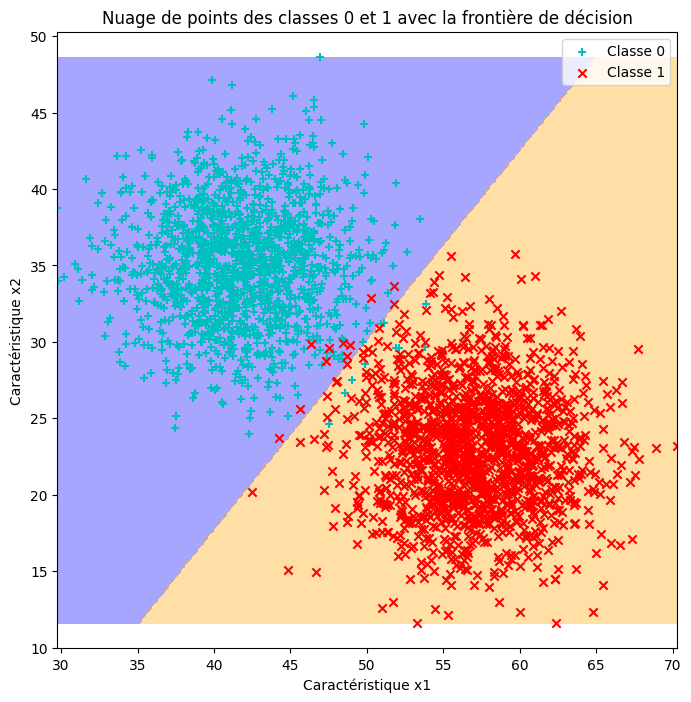

In [2]:
df = pd.read_csv("tp5_data1_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# mean_class_0 = class_0.mean()[:-1]
# mean_class_1 = class_1.mean()[:-1]

# Calcul des matrices de covariance pour chaque classe
cov_matrix_class_0 = class_0[["x1", "x2"]].cov().values
cov_matrix_class_1 = class_1[["x1", "x2"]].cov().values

mean_class_0 = class_0[["x1", "x2"]].mean().values
mean_class_1 = class_1[["x1", "x2"]].mean().values

# cov_matrix_class_0 = np.cov(class_0[["x1", "x2"]].values.T)
# cov_matrix_class_1 = np.cov(class_1[["x1", "x2"]].values.T)

# Calcul des inverses des matrices de covariance
inv_cov_matrix_class_0 = np.linalg.inv(cov_matrix_class_0)
inv_cov_matrix_class_1 = np.linalg.inv(cov_matrix_class_1)

# Calcul des déterminants des matrices de covariance
det_cov_matrix_class_0 = np.linalg.det(cov_matrix_class_0)
det_cov_matrix_class_1 = np.linalg.det(cov_matrix_class_1)

# Probabilité a priori des classes
prior_class_0 = len(class_0) / len(df)
prior_class_1 = len(class_1) / len(df)

# Fonction de prédiction utilisant la distance de Mahalanobis généralisée
def prediction(x):
    dist_class_0 = np.dot(np.dot((x - mean_class_0).T, inv_cov_matrix_class_0), (x - mean_class_0)) + np.log(det_cov_matrix_class_0) - 2 * np.log(prior_class_0)
    dist_class_1 = np.dot(np.dot((x - mean_class_1).T, inv_cov_matrix_class_1), (x - mean_class_1)) + np.log(det_cov_matrix_class_1) - 2 * np.log(prior_class_1)
    return 0 if dist_class_0 < dist_class_1 else 1

# Fonction pour afficher la frontière de décision
def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample=300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = np.array([[prediction(np.array([x1, x2])) for x1 in x1_list] for x2 in x2_list])
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1, colors=["blue", "orange"], alpha=0.35)

# Lecture des données de validation
df_valid = pd.read_csv("tp5_data1_valid.txt", names=["x1", "x2", "y"])
X_valid = df_valid[["x1", "x2"]].values
y_valid = df_valid["y"].values

# Prédiction sur les données de validation
y_pred = [prediction(x) for x in X_valid]

# Construction de la matrice de confusion
def confusion_matrix(y_valid, y_pred):
    confusion_matrix = pd.crosstab(pd.Series(y_pred, name='Predicted'), pd.Series(y_valid, name='Actual'))
    return confusion_matrix

# Calcul du taux d'erreur
def error_rate(y_valid, y_pred):
    num_errors = sum(y_valid != y_pred)
    error_rate = num_errors / len(y_valid)
    return error_rate

# Affichage du taux d'erreur et de la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_pred)
err_rate = error_rate(y_valid, y_pred)

print("Taux d'erreur du modèle : {:.2f}%".format(err_rate * 100))
print("\nMatrice de confusion :")
print(conf_matrix)

# Affichage de la frontière de décision et des nuages de points sur un même graphique
plt.figure(figsize=(8, 8))
plot_decision(df['x1'].min(), df['x1'].max(), df['x2'].min(), df['x2'].max(), prediction)
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Nuage de points des classes 0 et 1 avec la frontière de décision')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

Taux d'erreur du modèle : 5.00%

Matrice de confusion :
Actual        0     1
Predicted            
0          1653    78
1            97  1672


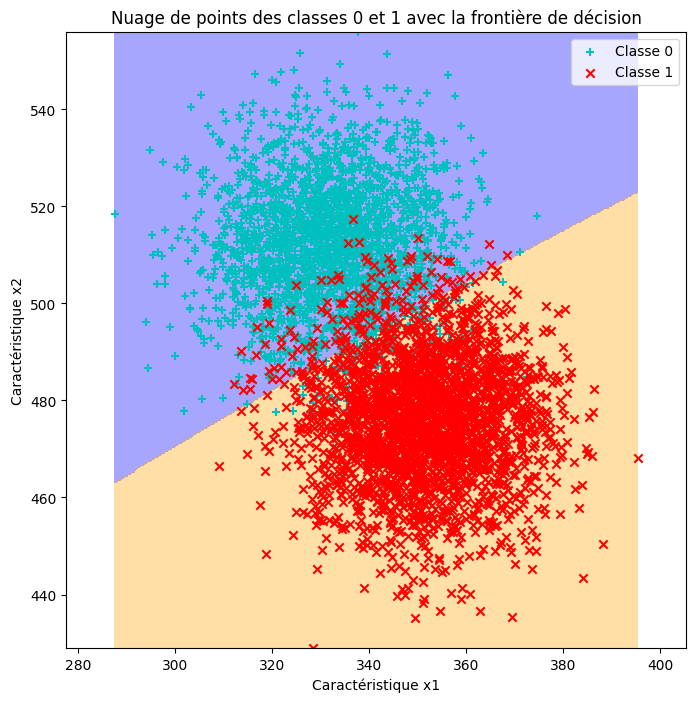

In [3]:
df = pd.read_csv("tp5_data2_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# mean_class_0 = class_0.mean()[:-1]
# mean_class_1 = class_1.mean()[:-1]

# Calcul des matrices de covariance pour chaque classe
cov_matrix_class_0 = class_0[["x1", "x2"]].cov().values
cov_matrix_class_1 = class_1[["x1", "x2"]].cov().values

mean_class_0 = class_0[["x1", "x2"]].mean().values
mean_class_1 = class_1[["x1", "x2"]].mean().values

# cov_matrix_class_0 = np.cov(class_0[["x1", "x2"]].values.T)
# cov_matrix_class_1 = np.cov(class_1[["x1", "x2"]].values.T)

# Calcul des inverses des matrices de covariance
inv_cov_matrix_class_0 = np.linalg.inv(cov_matrix_class_0)
inv_cov_matrix_class_1 = np.linalg.inv(cov_matrix_class_1)

# Calcul des déterminants des matrices de covariance
det_cov_matrix_class_0 = np.linalg.det(cov_matrix_class_0)
det_cov_matrix_class_1 = np.linalg.det(cov_matrix_class_1)

# Probabilité a priori des classes
prior_class_0 = len(class_0) / len(df)
prior_class_1 = len(class_1) / len(df)

# Fonction de prédiction utilisant la distance de Mahalanobis généralisée
def prediction(x):
    dist_class_0 = np.dot(np.dot((x - mean_class_0).T, inv_cov_matrix_class_0), (x - mean_class_0)) + np.log(det_cov_matrix_class_0) - 2 * np.log(prior_class_0)
    dist_class_1 = np.dot(np.dot((x - mean_class_1).T, inv_cov_matrix_class_1), (x - mean_class_1)) + np.log(det_cov_matrix_class_1) - 2 * np.log(prior_class_1)
    return 0 if dist_class_0 < dist_class_1 else 1

# Fonction pour afficher la frontière de décision
def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample=300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = np.array([[prediction(np.array([x1, x2])) for x1 in x1_list] for x2 in x2_list])
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1, colors=["blue", "orange"], alpha=0.35)

# Lecture des données de validation
df_valid = pd.read_csv("tp5_data2_valid.txt", names=["x1", "x2", "y"])
X_valid = df_valid[["x1", "x2"]].values
y_valid = df_valid["y"].values

# Prédiction sur les données de validation
y_pred = [prediction(x) for x in X_valid]

# Construction de la matrice de confusion
def confusion_matrix(y_valid, y_pred):
    confusion_matrix = pd.crosstab(pd.Series(y_pred, name='Predicted'), pd.Series(y_valid, name='Actual'))
    return confusion_matrix

# Calcul du taux d'erreur
def error_rate(y_valid, y_pred):
    num_errors = sum(y_valid != y_pred)
    error_rate = num_errors / len(y_valid)
    return error_rate

# Affichage du taux d'erreur et de la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_pred)
err_rate = error_rate(y_valid, y_pred)

print("Taux d'erreur du modèle : {:.2f}%".format(err_rate * 100))
print("\nMatrice de confusion :")
print(conf_matrix)

# Affichage de la frontière de décision et des nuages de points sur un même graphique
plt.figure(figsize=(8, 8))
plot_decision(df['x1'].min(), df['x1'].max(), df['x2'].min(), df['x2'].max(), prediction)
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Nuage de points des classes 0 et 1 avec la frontière de décision')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

In [43]:

def prediction(x):
    dist_class_0 = np.dot(np.dot((x - mean_class_0).T, inv_cov_matrix_class_0), (x - mean_class_0)) + np.log(det_cov_matrix_class_0) - 2 * np.log(prior_class_0)
    dist_class_1 = np.dot(np.dot((x - mean_class_1).T, inv_cov_matrix_class_1), (x - mean_class_1)) + np.log(det_cov_matrix_class_1) - 2 * np.log(prior_class_1)
    return (~(dist_class_0 < dist_class_1)).astype(int)




[[ -6.4796565    3.44453662]
 [ 40.38853799 -34.74878338]
 [ -4.15669509  -4.13017114]
 ...
 [ 18.44151427 -35.4847434 ]
 [  5.91862834 -10.41943929]
 [ 15.7126808  -56.24144714]]


array([11.88970229, 29.81795707, 11.74962609, ..., 21.63514784,
       12.45017306, 32.75043833])

In [49]:
def get_predictor( mu0, mu1, sigma0, sigma1, p0, p1):
    inv_sigma0 = np.linalg.inv(sigma0)
    inv_sigma1 = np.linalg.inv(sigma1)

    det_sigma0 = np.linalg.det(sigma0)
    det_sigma1 = np.linalg.det(sigma1)

    b0 = np.log(det_sigma0) - 2 * np.log(p0)
    b1 = np.log(det_sigma1) - 2 * np.log(p1)

    def prediction(X):
        d0 = np.sum(((X-mu0)@inv_sigma0)*(X-mu0), axis=1) + b0
        d1 = np.sum(((X-mu1)@inv_sigma1)*(X-mu1), axis=1) + b1
        return (~(d0 < d1)).astype(int)

    return prediction

prediction= get_predictor(mean_class_0, mean_class_1, cov_matrix_class_0, cov_matrix_class_1, prior_class_0, prior_class_1)

prediction(X_train)

array([0, 1, 0, ..., 1, 0, 1])